<a href="https://colab.research.google.com/github/ash827/DS-Unit-2-Kaggle-Challenge/blob/master/Ashley_Eddings_assignment_kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [X] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [X] Continue to participate in our Kaggle challenge.
- [X] Try Ordinal Encoding.
- [X] Try a Random Forest Classifier.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_






### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module2')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
# Import Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pandas as pd
import pandas_profiling
import category_encoders as ce
import time
from datetime import date
from math import sqrt
from mpl_toolkits import mplot3d
from ipywidgets import interact
import seaborn as sns
import plotly.express as px
import sklearn; sklearn.__version__
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV

In [4]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
train, val = train_test_split(train, train_size = 0.80, test_size = 0.20,
                             stratify = train['status_group'], random_state = 42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
train.date_recorded= pd.to_datetime(train.date_recorded)

## Wrangle Data

In [0]:
def wrangle(X):
  
  X = X.copy()
  
  #Latitude has small values near zero, so we'r going to 
  #replace them as zero
  X['latitude'] = X['latitude'].replace(-2e-08, 0)
  
  #Replacing the zeros with null values to impute later
  #Also creating the 'missing indicator'
  cols_with_zeros = ['longitude', 'latitude']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)
    X[col+'_MISSING'] = X[col].isnull()
    
  #Let's drop some duplicate columns
  dups = ['quantity_group', 'payment_type']
  X = X.drop(columns=dups)
  
  #Dropping scheme_name as there are over 20,000 null values
  X = X.drop(columns='scheme_name')
         
  #Drop recorded_by since it never varies, and id since it always varies and is random
  unusable_variance = ['recorded_by', 'id']
  X = X.drop(columns=unusable_variance)
  
  #Convert date_recorded to datetime  
  X['date_recorded'] = pd.to_datetime(X.date_recorded)
  
  #Extracting the components from date-recorded, and then dropping that column
  X['year_recorded'] = X['date_recorded'].dt.year
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  X = X.drop(columns='date_recorded')
  
  #Feature Engineering - how many years from construction_year to date_recorded
  X['years'] = X['year_recorded'] - X['construction_year']
  X['years_MISSING'] = X['years'].isnull()
  
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [8]:
train.shape, test.shape, val.shape

((47520, 42), (14358, 41), (11880, 42))

In [9]:
#Checking for null values
train.isnull().sum()

amount_tsh                  0
funder                   2904
gps_height                  0
installer                2917
longitude                1442
latitude                 1442
wpt_name                    0
num_private                 0
basin                       0
subvillage                286
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           2644
scheme_management        3128
permit                   2443
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
water_quality               0
quality_group               0
quantity                    0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint

In [10]:
#I chose to forward fill my null values and not remove them, so my data doesn't become too scewed. 
col = ['funder', 'installer', 'longitude', 'latitude', 'subvillage', 'public_meeting', 'scheme_management', 'permit']
train.loc[:,col] = train.loc[:,col].ffill()
train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,longitude_MISSING,latitude_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
43360,0.0,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,VWC,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,False,2011,7,27,2011,False
7263,500.0,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,WUA,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,False,2011,3,23,3,False
2486,25.0,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,VWC,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,False,False,2011,3,7,1,False
313,0.0,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,VWC,True,0,other,other,other,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,non functional,False,False,2011,7,31,2011,False
52726,0.0,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,VWC,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,False,False,2011,3,10,2011,False


In [11]:
#Checking to make sure the null values are all filled
train.isnull().sum()
#Well, I guess 1 null value isn't so bad...

amount_tsh               0
funder                   1
gps_height               0
installer                1
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   1
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
longitude_MISSING        0
latitude_MISSING         0
y

##Feature Selection

In [12]:
#This is the target
target = 'status_group'

#Creating a dataframe with all of the train columns except for the target
train_features = train.drop(columns=[target])

#List of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

#Series with cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

#list of categorical features with a cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

#Combining the lists
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'year_recorded', 'month_recorded', 'day_recorded', 'years', 'basin', 'region', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'longitude_MISSING', 'latitude_MISSING', 'years_MISSING']


##Arrange features into X feature matrix and y target vector

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

## Decision Tree

In [14]:
#Using Decision Tree as part of a tool to help predict
decision_tree = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    DecisionTreeClassifier(random_state=42)
)

decision_tree.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'scheme_management',
                                     'permit', 'extraction_type',
                                     'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'water_quality', 'quality_group',
                                     'quantity', 'source', 'source_type',
                                     'source_class', 'waterpoint_type',
                                     'waterpoint_type_group'],
                               drop_in...
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
  

In [15]:
decision_tree.named_steps

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 'onehotencoder': OneHotEncoder(cols=['basin', 'region', 'scheme_management', 'permit',
                     'extraction_type', 'extraction_type_group',
                     'extraction_type_class', 'management', 'management_group',
                     'payment', 'water_quality', 'quality_group', 'quantity',
                     'source', 'source_type', 'source_class', 'waterpoint_type',
                     'waterpoint_type_group'],
               drop_invariant=False, handle_missing='value',
               handle_unknown='value', return_df=True, use_cat_n

In [16]:
model = decision_tree.named_steps['decisiontreeclassifier']

model.feature_importances_

array([2.35814486e-02, 6.35016777e-02, 1.58475700e-01, 1.40447340e-01,
       1.43842597e-03, 9.88599323e-03, 1.72212751e-02, 4.54279534e-02,
       2.46732937e-02, 1.28786215e-03, 1.31959587e-02, 4.80884164e-02,
       2.10893688e-02, 5.50256284e-03, 6.57598260e-04, 1.55634215e-03,
       6.13672255e-04, 2.11268090e-03, 5.76059552e-04, 6.17279438e-04,
       2.67986015e-04, 1.53766004e-04, 2.53388610e-03, 2.38565466e-04,
       2.75982229e-04, 1.53129342e-04, 1.74065514e-04, 3.34588690e-03,
       5.48221277e-05, 1.05974425e-03, 1.28243751e-03, 2.23957828e-03,
       3.25822735e-04, 2.01280439e-04, 3.07682529e-04, 5.15343614e-04,
       4.30636574e-03, 5.79148808e-03, 2.96026230e-04, 4.78685315e-04,
       2.07839877e-03, 3.14567514e-04, 0.00000000e+00, 3.68129416e-03,
       2.58650880e-03, 2.01774608e-03, 1.46007382e-03, 1.38347151e-03,
       3.84902232e-04, 9.52698121e-04, 1.57033580e-03, 1.77898499e-03,
       4.51878803e-04, 3.03824745e-04, 1.16378526e-04, 0.00000000e+00,
      

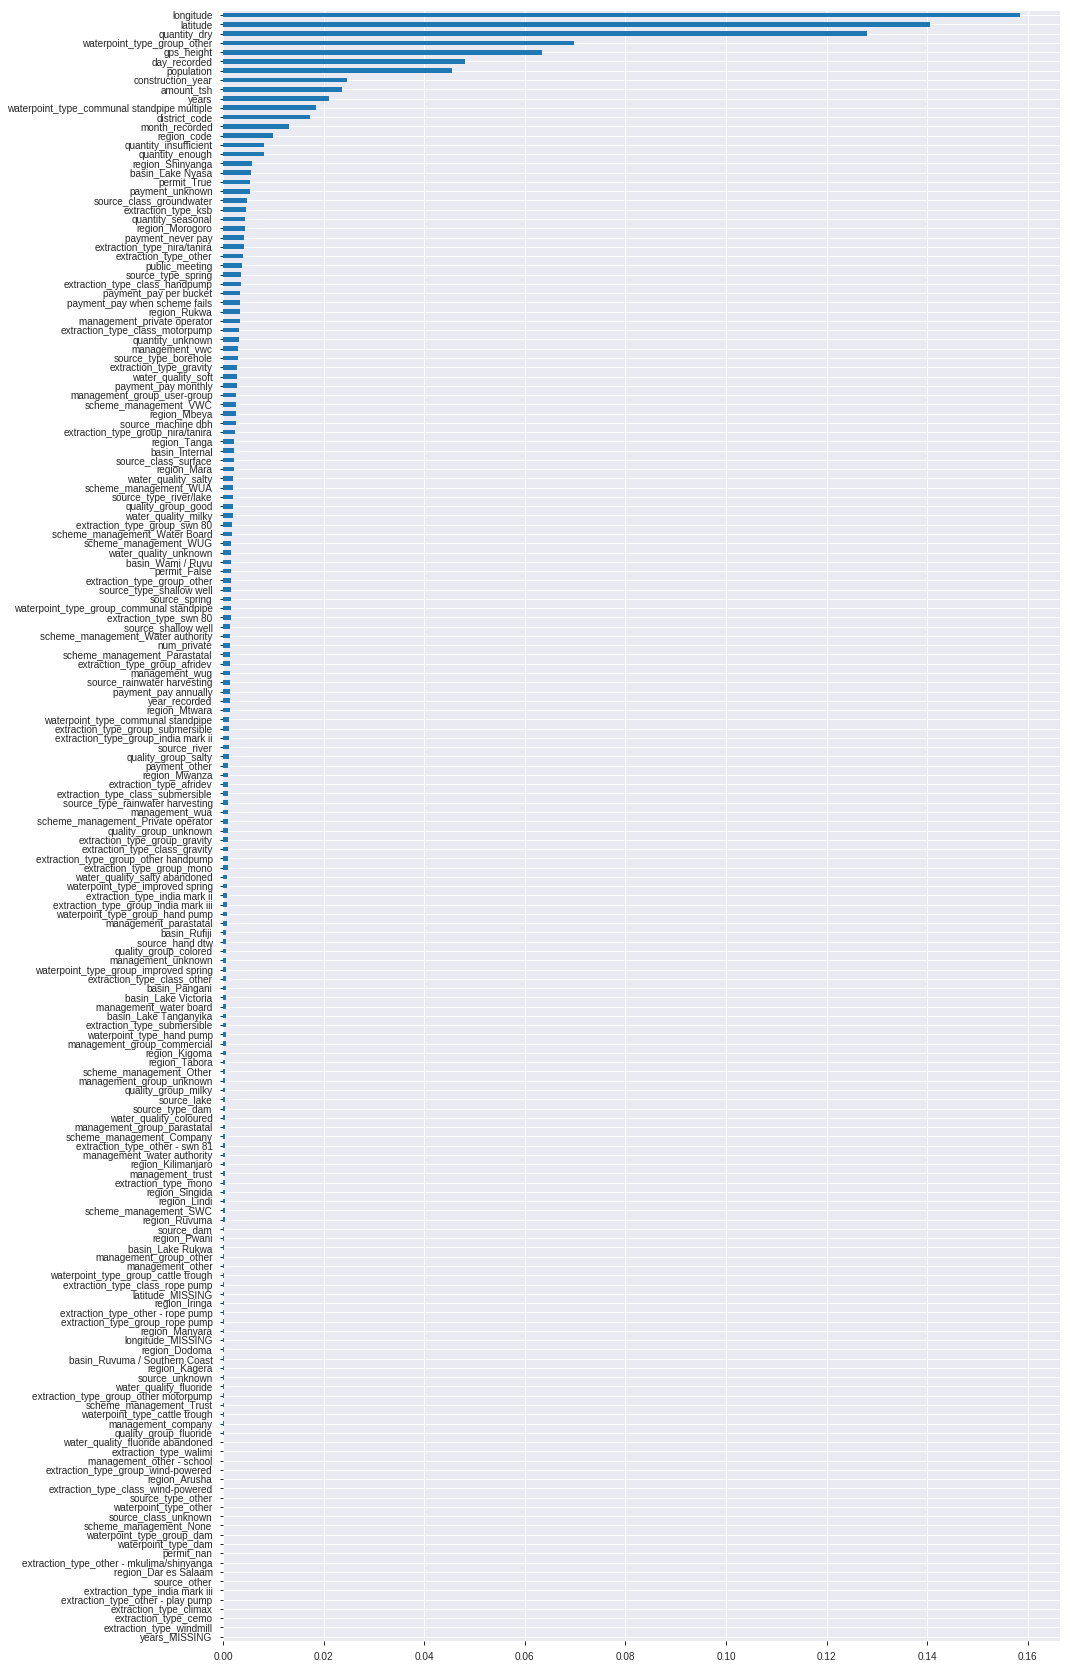

In [17]:
encoder = decision_tree.named_steps['onehotencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_,encoded_columns)
plt.figure(figsize=(15,30))
importances.sort_values().plot.barh();

## Let's drop those bottom columns from source_dam down.

In [18]:
test

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude_MISSING,latitude_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
0,0.0,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,Parastatal,True,2012,other,other,other,parastatal,parastatal,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,False,False,2013,2,4,1,False
1,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,VWC,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,2013,2,4,13,False
2,0.0,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,VWC,NaN,2010,other,other,other,vwc,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,False,False,2013,2,1,3,False
3,0.0,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,VWC,True,1987,other,other,other,vwc,user-group,unknown,soft,good,dry,shallow well,shallow well,groundwater,other,other,False,False,2013,1,22,26,False
4,500.0,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,Water Board,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,2013,3,27,13,False
5,0.0,Government Of Tanzania,1685,DWE,36.685279,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,VWC,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,2013,3,4,23,False
6,0.0,Government Of Tanzania,550,Gover,36.398041,-7.541382,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,VWC,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,salty,salty,enough,machine dbh,borehole,groundwater,hand pump,hand pump,False,False,2011,3,2,4,False
7,0.0,Finw,234,FinW,39.607420,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,Water Board,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,False,False,2013,1,25,31,False
8,30.0,Unicef,584,LGA,39.262951,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,VWC,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,2013,1,23,16,False
9,0.0,Lawatefuka Water Supply,1083,Lawatefuka water sup,37.096108,-3.251754,Kwa Flora Daud,0,Pangani,Donyomuruak,Kilimanjaro,3,7,Siha,Siha Kati,1,True,Water Board,True,2003,gravity,gravity,gravity,water board,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,2013,3,18,10,False


In [0]:
#train = train.drop(index='source_dam', 'region_Pwani', 'basin_Lake_Rukwa', 'management_group_other', 'management_other', 'waterpoint_type_group_cattle trough',
         # 'extraction_type_class_rope pump', 'latitude_MISSING', 'region_Manyara', 'region_Dodoma', 'basin_Ruvuma / Sou8thern Coast', 'region_Kagera',
         #'source_unknown', 'water_quality_flouride', 'extraction_type_group_other motorpump', 'scheme_management_Trust', 'waterpoint_type_cattle trough',
         # 'management_company', 'quality_group_flouride', 'water_quality_flouride abandoned', 'extraction_type_walimi', 'management_other - school',
         # 'extraction_type_group_wind-powered', 'region_Arusha', 'extraction_type_class_wind-powered', 'source_type_other', 'waterpoint_type_other',
         # 'source_class_unknown', 'scheme_management_None', 'waterpoint_type_group_dam', 'waterpoint_type_dam', 'permit_nan', 
          # 'extraction_type_other - mkulima/shinyanga', 'region_Dar es Salaam', 'source_other', 'extraction_type_india mark iii', 
          #'extraction_type_other - play pump', 'extraction_type_climax', 'extraction_type_cemo', 'extraction_type_windmill', 'years_MISSING')
#Got stuck here!


## Let's try a Random Forest :)

In [19]:
#Trying Random forest now to try and create some more accuracy
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names='True'),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=5, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
#78%, not bad!

Validation Accuracy 0.7858585858585858


In [20]:
#Encoding the random forest data
rf = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)

importances = pd.Series(rf.feature_importances_, encoded.columns)
importances

amount_tsh                                     0.017557
gps_height                                     0.056268
longitude                                      0.113060
latitude                                       0.113722
num_private                                    0.001190
region_code                                    0.012621
district_code                                  0.019176
population                                     0.038969
construction_year                              0.037000
year_recorded                                  0.005343
month_recorded                                 0.018358
day_recorded                                   0.052195
years                                          0.031780
basin_Lake Nyasa                               0.001799
basin_Rufiji                                   0.002520
basin_Wami / Ruvu                              0.002043
basin_Lake Victoria                            0.004961
basin_Internal                                 0

##Plotting our importances

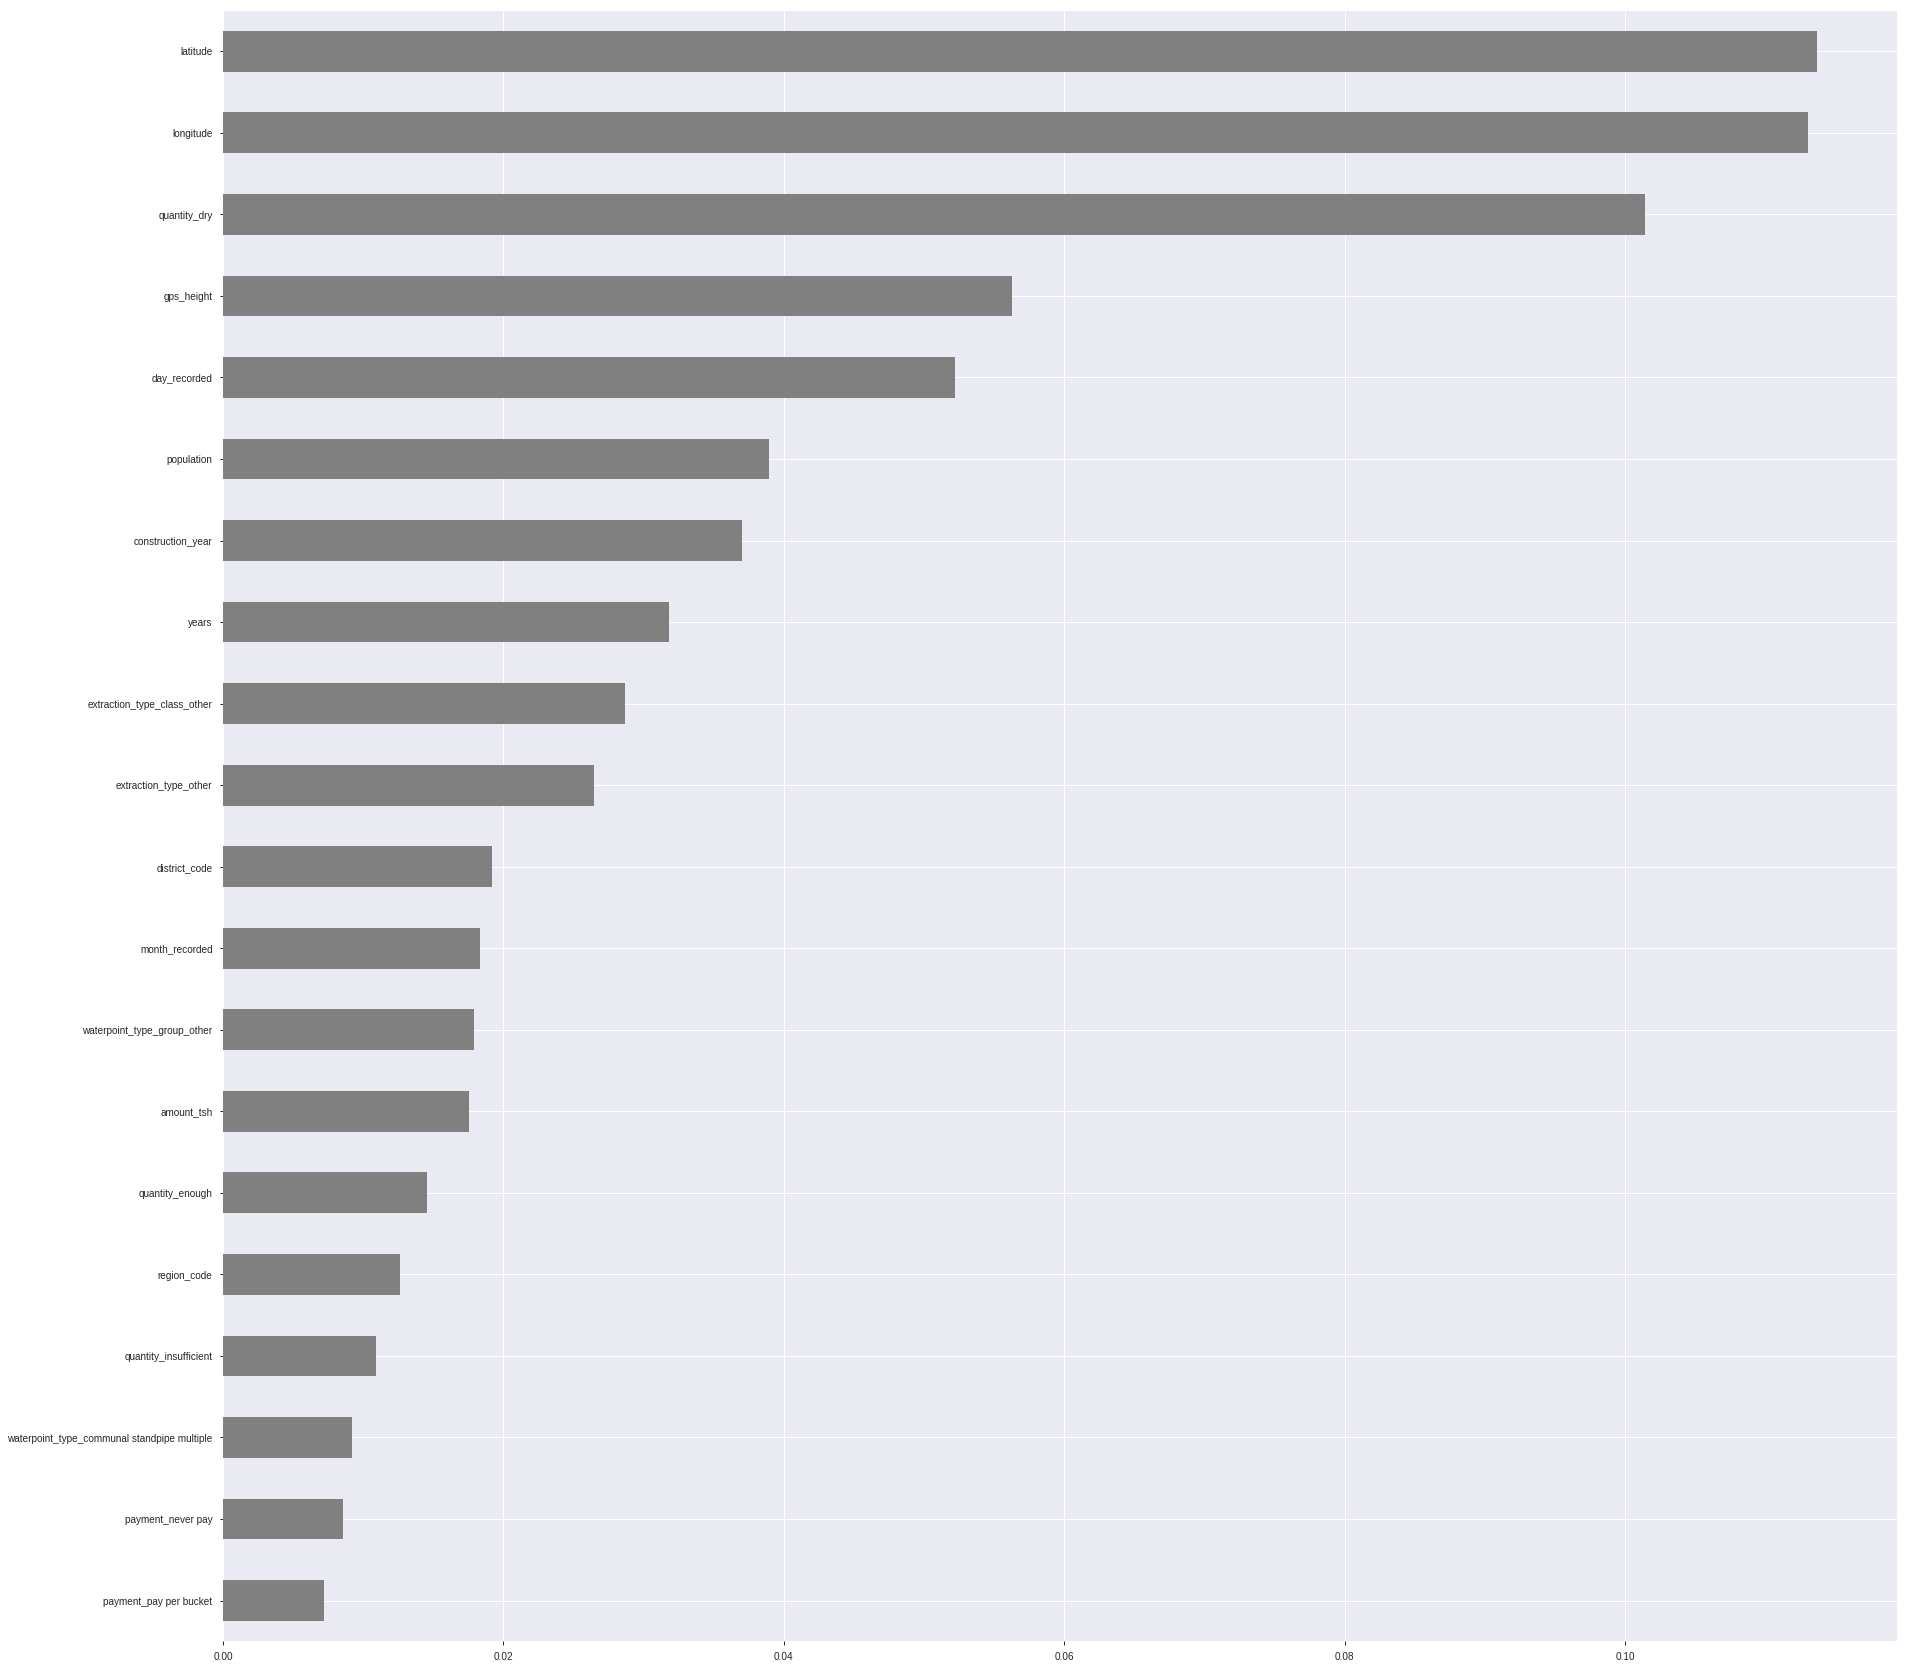

In [21]:
#This is the feature imprtances for the random forest data. Above showed the decision tree importances
n = 20
plt.figure(figsize=(30, 30))
importances.sort_values()[-n:].plot.barh(color='gray');

In [22]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (47520, 35)
X_train shape after encoding (47520, 176)


## One Hot Encoding

###Doing OneHot for a categorical feature to create 1s and 0s

In [23]:
#This shows our categorical features
X_train.select_dtypes(include='object')

,basin,region,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43360,Lake Nyasa,Mbeya,VWC,NaN,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
7263,Rufiji,Iringa,WUA,True,gravity,gravity,gravity,wua,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2486,Wami / Ruvu,Pwani,VWC,False,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
313,Lake Victoria,Kagera,VWC,True,other,other,other,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other
52726,Internal,Dodoma,VWC,True,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
8558,Lake Tanganyika,Rukwa,VWC,True,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
2559,Pangani,Arusha,VWC,True,gravity,gravity,gravity,vwc,user-group,pay monthly,soft,good,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe
54735,Internal,Dodoma,VWC,False,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
25763,Lake Rukwa,Mbeya,VWC,False,swn 80,swn 80,handpump,vwc,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump
44540,Lake Victoria,Mwanza,VWC,True,submersible,submersible,submersible,vwc,user-group,pay monthly,soft,good,enough,machine dbh,borehole,groundwater,other,other


In [24]:
#selecting a categorical feature to encode
feature = 'extraction_type_class'

X_train[feature].value_counts()

gravity         21448
handpump        13184
other            5193
submersible      4894
motorpump        2355
rope pump         353
wind-powered       93
Name: extraction_type_class, dtype: int64

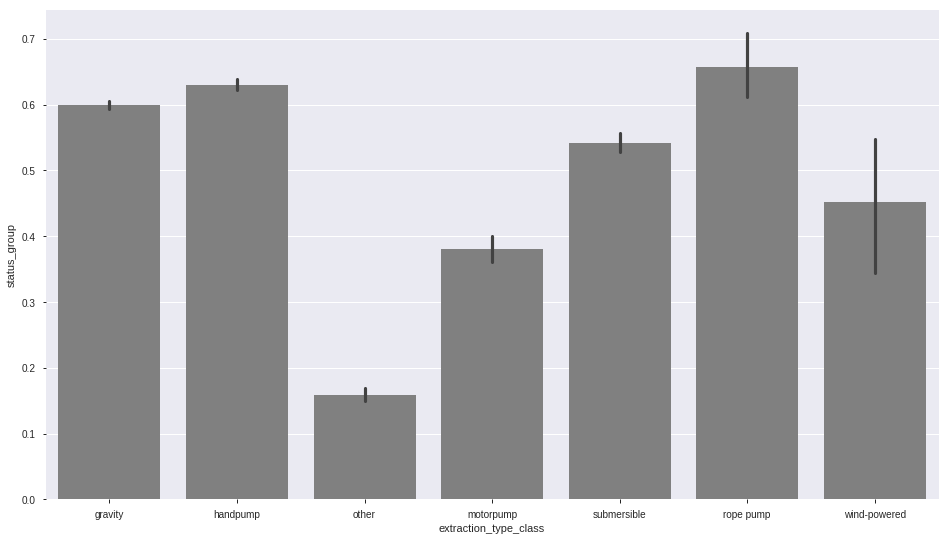

In [25]:
#Plotting the feature
plt.figure(figsize=(16,9))
sns.barplot(
    x=train[feature], 
    y=train['status_group']=='functional', 
    color='grey'
);

In [26]:
#Encoding the feature
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train[[feature]])
print(f'{len(encoded.columns)} columns')
encoded.head(20)
#We have now converted to 1s and 0s!

7 columns


,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_motorpump,extraction_type_class_submersible,extraction_type_class_rope pump,extraction_type_class_wind-powered
43360,1,0,0,0,0,0,0
7263,1,0,0,0,0,0,0
2486,0,1,0,0,0,0,0
313,0,0,1,0,0,0,0
52726,0,0,0,1,0,0,0
8558,1,0,0,0,0,0,0
2559,1,0,0,0,0,0,0
54735,0,0,0,1,0,0,0
25763,0,1,0,0,0,0,0
44540,0,0,0,0,1,0,0


## Ordinal Encoding

In [27]:
%%time 
#^This shows us how fast the code runs

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=5, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
# A little less of an accuracy score for Random Forest versus Decision Tree

Validation Accuracy 0.7775252525252525
CPU times: user 2.54 s, sys: 73.8 ms, total: 2.62 s
Wall time: 2.21 s


In [28]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (47520, 41)
X_train shape after encoding (47520, 41)


## Time to save for Kaggle!

In [30]:
X_test.shape, X_train.shape

((14358, 35), (47520, 41))

In [0]:
test_pred = pipeline.predict(test)
submission = sample_submission.copy()
submission['status_group'] = test_pred
submission.to_csv('kaggle03.csv', index=False)

In [0]:
from google.colab import files
files.download('kaggle03.csv')